<a href="https://colab.research.google.com/github/ShivanshGupta55/Musk-Non-Musk/blob/master/MUSK_Non_Musk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout, Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [0]:
data=pd.read_csv('/content/musk_csv.csv')

In [7]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46.0,-108.0,-60.0,-69.0,-117.0,49.0,38.0,-161.0,-8.0,5.0,-323.0,-220.0,-113.0,-299.0,-283.0,-307.0,-31.0,-106.0,-227.0,-42.0,-59.0,-22.0,-67.0,189.0,81.0,17.0,-27.0,-89.0,-67.0,105.0,-116.0,124.0,-106.0,5.0,-120.0,63.0,-165.0,...,81.0,-114.0,-187.0,45.0,-118.0,-75.0,-182.0,-234.0,-19.0,12.0,-13.0,-41.0,-119.0,-149.0,70.0,17.0,-20.0,-177.0,-101.0,-116.0,-14.0,-50.0,24.0,-81.0,-125.0,-114.0,-44.0,128.0,3.0,-244.0,-308.0,52.0,-7.0,39.0,126.0,156.0,-50.0,-112.0,96.0,1.0
1,2,MUSK-211,211_1+10,41.0,-188.0,-145.0,22.0,-117.0,-6.0,57.0,-171.0,-39.0,-100.0,-319.0,-111.0,-228.0,-281.0,-281.0,-300.0,54.0,-149.0,-98.0,-196.0,-27.0,-22.0,2.0,75.0,49.0,-34.0,45.0,-91.0,32.0,95.0,-116.0,85.0,-23.0,42.0,-58.0,61.0,-171.0,...,88.0,-21.0,-32.0,32.0,-128.0,-72.0,-124.0,-218.0,-94.0,53.0,-79.0,-20.0,-35.0,-26.0,4.0,50.0,17.0,-177.0,-102.0,-121.0,-66.0,-77.0,51.0,-41.0,-34.0,-32.0,-63.0,115.0,-5.0,-235.0,-59.0,-2.0,52.0,103.0,136.0,169.0,-61.0,-136.0,79.0,1.0
2,3,MUSK-211,211_1+11,46.0,-194.0,-145.0,28.0,-117.0,73.0,57.0,-168.0,-39.0,-22.0,-319.0,-111.0,-104.0,-283.0,-282.0,-303.0,52.0,-152.0,-97.0,-225.0,-28.0,-22.0,2.0,179.0,49.0,-33.0,46.0,-88.0,22.0,79.0,-116.0,19.0,-11.0,6.0,-38.0,71.0,-175.0,...,64.0,0.0,-23.0,-15.0,-129.0,-74.0,-125.0,-221.0,-93.0,53.0,-72.0,-19.0,-33.0,-26.0,3.0,49.0,17.0,-177.0,-102.0,-119.0,-66.0,-81.0,51.0,-41.0,-27.0,-41.0,-140.0,77.0,-163.0,-238.0,-134.0,-154.0,57.0,143.0,142.0,165.0,-67.0,-145.0,39.0,1.0
3,4,MUSK-211,211_1+12,41.0,-188.0,-145.0,22.0,-117.0,-7.0,57.0,-170.0,-39.0,-99.0,-319.0,-111.0,-228.0,-282.0,-281.0,-301.0,54.0,-150.0,-98.0,-196.0,-28.0,-22.0,2.0,77.0,48.0,-34.0,46.0,-91.0,32.0,94.0,-116.0,84.0,-23.0,41.0,-58.0,62.0,-171.0,...,88.0,-20.0,-32.0,32.0,-128.0,-73.0,-125.0,-220.0,-93.0,53.0,-78.0,-19.0,-34.0,-26.0,4.0,50.0,17.0,-177.0,-101.0,-121.0,-65.0,-77.0,52.0,-41.0,-34.0,-32.0,-66.0,115.0,-7.0,-236.0,-60.0,-4.0,52.0,104.0,136.0,168.0,-60.0,-135.0,80.0,1.0
4,5,MUSK-211,211_1+13,41.0,-188.0,-145.0,22.0,-117.0,-7.0,57.0,-170.0,-39.0,-99.0,-319.0,-111.0,-228.0,-282.0,-281.0,-301.0,54.0,-150.0,-98.0,-196.0,-28.0,-22.0,2.0,78.0,48.0,-34.0,46.0,-91.0,31.0,94.0,-116.0,84.0,-23.0,41.0,-58.0,62.0,-171.0,...,88.0,-20.0,-32.0,32.0,-128.0,-73.0,-125.0,-220.0,-93.0,53.0,-78.0,-19.0,-34.0,-26.0,4.0,50.0,17.0,-177.0,-101.0,-121.0,-65.0,-76.0,52.0,-41.0,-34.0,-32.0,-66.0,115.0,-8.0,-236.0,-60.0,-4.0,52.0,104.0,137.0,168.0,-60.0,-135.0,80.0,1.0


In [8]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,4465.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.00000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,...,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000
mean,2233.000000,66.228047,-129.676971,-82.870072,-13.405018,-99.094534,5.136201,-4.892025,-25.502016,-74.539875,-43.204973,-146.703181,-101.047715,-67.194444,-156.910394,-150.838262,-276.544579,-52.264561,-78.700941,-71.315860,-58.089158,-72.096550,-43.720654,-57.306228,68.53853,38.924059,-58.494848,-21.068548,-106.338934,0.738575,14.886649,-80.121864,27.743952,-31.961470,-77.029570,-76.234319,113.182572,-134.739471,-4.847894,-82.769041,...,-17.542787,-68.470654,-105.256496,5.093190,-50.012321,-79.258065,-102.361559,-117.864247,-37.830645,-6.895385,-54.389561,-58.707213,-49.975134,-63.829077,1.321685,10.211918,-11.033378,-161.563620,-90.009185,-113.988127,-30.315636,-56.395609,4.976030,-52.168907,-68.357303,-58.764785,-80.242832,38.307124,-65.889337,-218.132841,-192.208109,-86.535170,-23.192876,68.074373,120.063844,199.448925,-41.631720,-138.333781,38.336918,0.227823
std,1289.078805,63.047933,86.341186,62.473833,74.314231,76.482284,80.087885,108.299354,94.805210,106.182503,79.992190,117.993944,88.002242,69.016388,103.628821,104.023853,57.477533,111.966338,65.644808,89.964983,90.151222,84.200117,99.272971,97.507274,120.45289,106.106507,103.223078,89.659314,67.844579,61.474309,121.650006,89.229743,108.104314,58.287153,119.468682,74.565571,65.008488,87.208574,86.757002,65.076822,...,128.638211,78.552078,91.361381,65.219162,86.452079,69.872880,73.784931,89.543500,57.884979,95.772819,69.542092,97.889280,72.805750,78.654488,83.685256,100.317646,100.321305,64.540378,46.582135,23.161439,57.877517,67.802393,82.781061,62.432904,66.020535,66.291207,76.577216,102.681939,98.793979,71.800400,109.972123,123.269364,76.648993,105.367736,84.623446,68.066746,65.582562,84.365649,103.213367,0.419475
min,1.000000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-182.000000,-171.000000,-225.000000,-242.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-250.000000,-76.00000,-100.000000,-242.000000,-204.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-277.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-218.000000,-307.000000,-188.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-195.000000,-196.000000,-199.000000,-243.000000,-283.000000,-290.000000,-184.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-199.000000,-213.000000,-189.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-326.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1117.000

In [12]:
data.isnull().sum()

ID                   0
molecule_name        0
conformation_name    1
f1                   1
f2                   1
                    ..
f163                 1
f164                 1
f165                 1
f166                 1
class                1
Length: 170, dtype: int64

In [0]:
data = data.dropna()

In [0]:
X=data.loc[:,'f1':'f166']
Y=data.loc[:,'class']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [0]:
#max_depth was selected after looping in range 50
model=RandomForestClassifier(max_depth=26,random_state=20) 

In [18]:
#Random Forest with depth and random state in local optimum of range 1 to 50
rf={}
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
rf['accuracy']=accuracy_score(y_test,y_pred)
rf['f1_score']=f1_score(y_test,y_pred)
rf['precision']=precision_score(y_test,y_pred)
rf['recall']=recall_score(y_test,y_pred)
print(rf)   

{'accuracy': 0.9675251959686451, 'f1_score': 0.9242819843342037, 'precision': 1.0, 'recall': 0.8592233009708737}


In [19]:
#with MinMaxScaler and Random Forest
mmscaler=MinMaxScaler()
X_scaled=mmscaler.fit_transform(x_train)
model.fit(X_scaled,y_train)
X_testscaled=mmscaler.fit_transform(x_test)
print('accuracy with scaled values',accuracy_score(y_test,model.predict(X_testscaled)))

accuracy with scaled values 0.9585666293393057


In [20]:
#Random Forest after dropping correlated features
#output ..accuracy and other evaluations on test set
corr_matrix = X.corr().abs()
rfcorr={}

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]
X_corr=X.drop(X[to_drop],axis=1)
x_corrtrain,x_corrtest,y_corrtrain,y_corrtest=train_test_split(X_corr,Y,test_size=0.2,random_state=12)
model.fit(x_corrtrain,y_corrtrain)
y_corrpred=model.predict(x_corrtest)
rfcorr['accuracy']=accuracy_score(y_corrtest,y_corrpred)
rfcorr['f1_score']=f1_score(y_corrtest,y_corrpred)
rfcorr['precision']=precision_score(y_corrtest,y_corrpred)
rfcorr['recall']=recall_score(y_corrtest,y_corrpred)
print(rfcorr)  

{'accuracy': 0.9652855543113102, 'f1_score': 0.9186351706036746, 'precision': 1.0, 'recall': 0.8495145631067961}


In [21]:
#multilayer perceptron MLP based approach
nmodel = Sequential()
nmodel.add(Dense(128, input_shape=(166,), activation='relu'))
nmodel.add(Dense(64, activation='relu'))
nmodel.add(Dropout(0.2))
nmodel.add(Dense(64, activation='relu'))
nmodel.add(Dropout(0.2))
nmodel.add(Dense(64, activation='relu'))
nmodel.add(Dense(1, activation='sigmoid'))
from tensorflow.keras.optimizers import RMSprop
X_sc=mmscaler.fit_transform(x_train)
X_sctest=mmscaler.fit_transform(x_test)
nmodel.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])
nmodel.summary()

history=nmodel.fit(X_sc,y_train,validation_data=(X_sctest,y_test),epochs=100)
score = nmodel.evaluate(X_testscaled,y_test)
print(score)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               21376     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dens

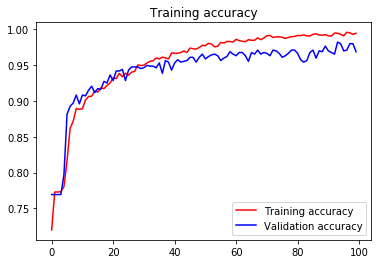

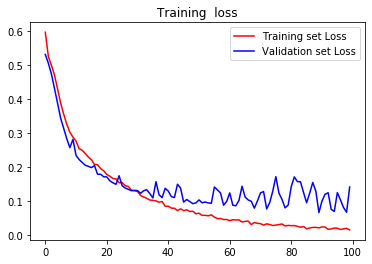

In [24]:
import matplotlib.pyplot as plt
nn={}
ac = history.history['acc']
vac=history.history['val_acc']
loss = history.history['loss']
vloss=history.history['val_loss']
epochs = range(len(ac))
plt.plot(epochs, ac, 'r', label='Training accuracy')
plt.plot(epochs, vac, 'b', label='Validation accuracy')
plt.title('Training accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss, 'r', label='Training set Loss')
plt.plot(epochs, vloss, 'b', label='Validation set Loss')
plt.title('Training  loss')
plt.legend()
plt.show()

 MLP and Random Forest based approach performs really well on training and test/validation sets after tuning of hyperparams and dropping high correlation features. 
 Training CNNs is more costly in reference to computational costs.